In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

# for wrangling
import wrangle
import explore

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
zil = wrangle.wrangle_zillow()

#### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [3]:
# cool cool cool

#### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
train, val, test = wrangle.split_data(zil)

In [5]:
train, val, test = wrangle.impute_mode(train, val, test, 'built')

In [6]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles


In [7]:
train = wrangle.feature_engineer(train)
val = wrangle.feature_engineer(val)
test = wrangle.feature_engineer(test)

In [9]:
train.location_percentile.value_counts()

1    278295
4    278293
2    278292
3    278291
Name: location_percentile, dtype: int64

#### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
# def plot_variable_pairs(df):
#     # fig, axes = plt.subplots(len(df.columns.values),len(df.columns.values),figsize=(20,20))
#     # for i, col in enumerate(df.columns.values):
#     #     for j, col2 in enumerate(df.columns.values):
#     #         sns.lmplot(axes[i,j], data=df, x=col, y=col2, line_kws={'color':'red'})
#     #         axes[i,j].set_title(f'{col} vs {col2}')
#     sns.pairplot(data=df, corner=True, kind='reg')
#     plt.show()
            

In [9]:
# plot_variable_pairs(train[['beds', 'baths','built','sqft']])

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [10]:
# def plot_cat_and_cont_vars(df, cat_cols, cont_cols):
#     fig, axs = plt.subplots(len(cont_cols), 3, figsize=(16,10))
#     for row, col in enumerate(cont_cols):
#         for clm, col2 in enumerate(cat_cols):
#             axs[row,1].plot(df[col], df[col2])
#             axs[row,1].set_title(df[col], df[col2])

#### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [11]:
# they both are terrible.

#### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [12]:
# Done. Still terrible.

#### 7. Come up with some initial hypotheses based on your goal of predicting property value.

In [13]:
# Is there a relationship between taxes and tax_value? Control for location? Control for decade built?
# How do different ranges of tax_values compare in beds? baths? Control for location? Control for decade built?
# Are there any subgroups that can be created? 
# Do the means or median of each decade change? Contorl for location?

#### 8. Visualize all combinations of variables in some way.

In [90]:
train.built.max()

2016.0

In [91]:
# train['decade'] = pd.cut(train.built, 
#                          bins=[1800,1850,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], 
#                          labels=['1800', '1850', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010'])

In [92]:
# train.decade = train.decade.astype(int)

In [93]:
train.location.value_counts()

Los Angeles    744823
Orange         281033
Ventura         87315
Name: location, dtype: int64

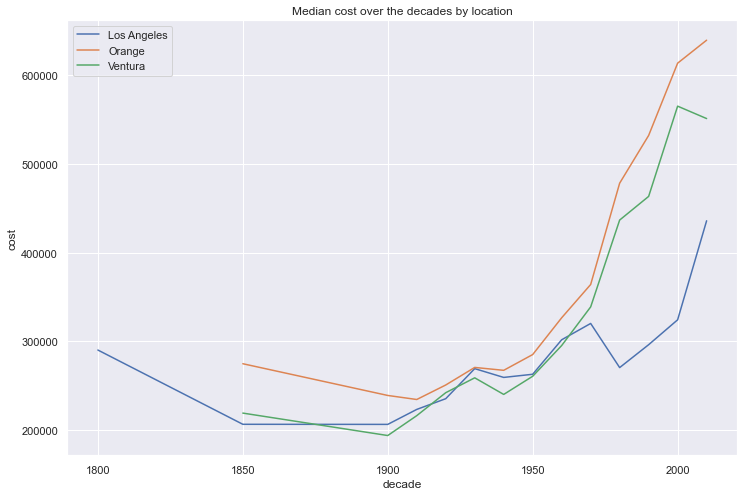

In [94]:
plt.figure(figsize=(12,8))
plt.plot(train[train.location == 'Los Angeles'].groupby('decade').tax_value.median(), label='Los Angeles')
plt.plot(train[train.location == 'Orange'].groupby('decade').tax_value.median(), label='Orange')
plt.plot(train[train.location == 'Ventura'].groupby('decade').tax_value.median(), label='Ventura')
plt.xlabel('decade')
plt.ylabel('cost')
plt.title('Median cost over the decades by location')
plt.legend()
plt.show()

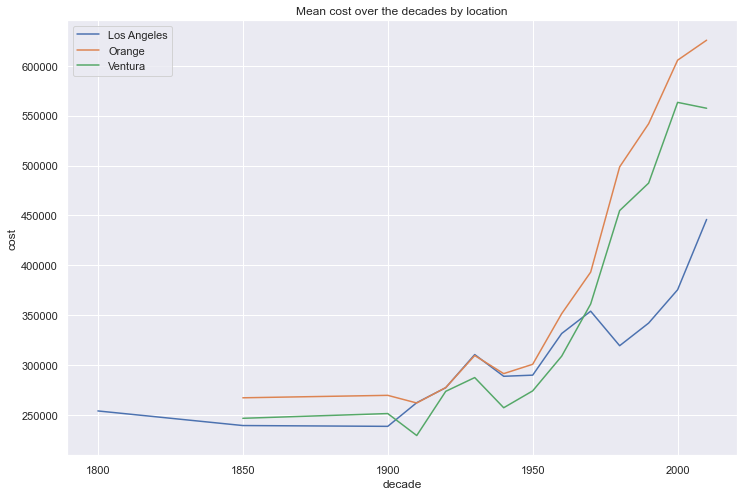

In [95]:
plt.figure(figsize=(12,8))
plt.plot(train[train.location == 'Los Angeles'].groupby('decade').tax_value.mean(), label='Los Angeles')
plt.plot(train[train.location == 'Orange'].groupby('decade').tax_value.mean(), label='Orange')
plt.plot(train[train.location == 'Ventura'].groupby('decade').tax_value.mean(), label='Ventura')
plt.xlabel('decade')
plt.ylabel('cost')
plt.title('Mean cost over the decades by location')
plt.legend()
plt.show()

In [96]:
# Taxes go up steadily even though home price does not (around 1970s for blue and 2010s for green/orange)

In [11]:
train[train.location=='Los Angeles'][['taxes']].describe(percentiles=[.25,.5,.75,]).T

,count,mean,std,min,25%,50%,75%,max
taxes,744823.0,3921.964532,2210.956691,45.32,2243.965,3560.36,5263.4,10377.7


In [98]:

# dist = []
# for index, house in train.iterrows():
#     if house.location == 'Los Angeles':
#         if house.tax_value <= 158299:
#             dist.append('1q')
#         elif house.tax_value <= 268714:
#             dist.append('2q')
#         elif house.tax_value <= 415949:
#             dist.append('3q')
#         elif house.tax_value <= 950000:
#             dist.append('4q')
#         else:
#             dist.append('ukn')
#     elif house.location == 'Orange':
#         if house.tax_value <= 222884:
#             dist.append('1q')
#         elif house.tax_value <= 362234:
#             dist.append('2q')
#         elif house.tax_value <= 529000:
#             dist.append('3q')
#         elif house.tax_value <= 950940:
#             dist.append('4q')
#         else:
#             dist.append('ukn')
#     elif house.location == 'Ventura':
#         if house.tax_value <= 222515:
#             dist.append('1q')
#         elif house.tax_value <= 347481:
#             dist.append('2q')
#         elif house.tax_value <= 490000:
#             dist.append('3q')
#         elif house.tax_value <= 950809:
#             dist.append('4q')
#         else:
#             dist.append('ukn')
#     else:
#         dist.append('ukn')

In [99]:
# train['location_percentile'] = dist

In [100]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4


In [106]:
train[train.location == 'Ventura'].describe().T

,count,mean,std,min,25%,50%,75%,max
beds,87315.0,3.488725,0.736000,2.0,3.00,3.00,4.00,5.00
baths,87315.0,2.231180,0.598377,1.0,2.00,2.00,2.50,4.00
sqft,87315.0,1812.844563,572.010099,102.0,1372.00,1726.00,2173.00,3410.00
tax_value,87315.0,362885.976167,197017.005825,6439.0,221036.00,346318.00,489532.00,950781.00
built,87315.0,1972.151440,17.103048,1880.0,1962.00,1970.00,1984.00,2016.00
taxes,87315.0,4149.381052,2187.644255,34.6,2578.57,3969.28,5553.95,10377.48
city,87315.0,6111.000000,0.000000,6111.0,6111.00,6111.00,6111.00,6111.00
decade,87315.0,1966.476550,17.462262,1850.0,1960.00,1960.00,1980.00,2010.00
location_percentile,87315.0,2.494875,1.119283,1.0,1.00,2.00,3.00,4.00


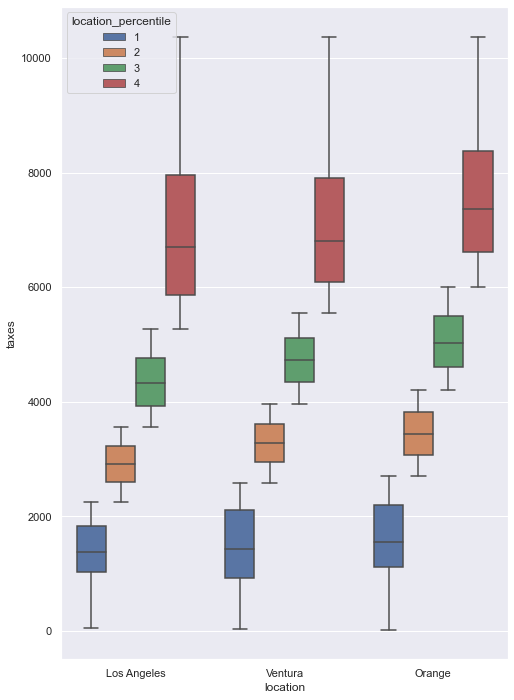

In [11]:
plt.figure(figsize=(8,12))
sns.boxplot(data=train, y='taxes', x='location', hue='location_percentile', hue_order=['1','2','3','4'])
plt.show()

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1113171.0,3.213690,0.780884,2.00,3.000,3.00,4.00,5.0
baths,1113171.0,2.053613,0.707949,1.00,2.000,2.00,2.50,4.0
sqft,1113171.0,1653.787247,564.459799,1.00,1232.000,1548.00,1987.00,3410.0
tax_value,1113171.0,327901.278059,198990.082810,22.00,173717.000,296496.00,452500.00,950940.0
built,1113171.0,1959.441323,20.538500,1812.00,1949.000,1957.00,1972.00,2016.0
taxes,1113171.0,4068.495844,2242.611933,20.24,2365.455,3745.75,5488.08,10377.7
city,1113171.0,6048.358575,20.559707,6037.00,6037.000,6037.00,6059.00,6111.0
decade,1113171.0,1953.801734,20.889229,1800.00,1940.000,1950.00,1970.00,2010.0


In [13]:
# train['overall_percentile'] = pd.cut(train.tax_value,
#                                     bins = [0,173983,296717,452500,950940],
#                                     labels = ['1q','2q','3q','4q'])

In [14]:
# pd.crosstab(train.location, train.overall_percentile, margins=True)

In [29]:
# 6037 seems to have the most in the lower cost ranges and 6059 has the most in the higher cost ranges

In [15]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4


In [16]:
train.beds.median(), train.baths.median()

(3.0, 2.0)

<AxesSubplot:xlabel='baths', ylabel='count'>

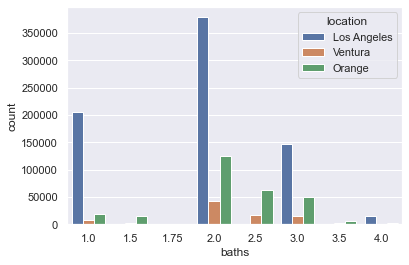

In [17]:
sns.countplot(data=train, x='baths', hue='location')

<AxesSubplot:xlabel='beds', ylabel='count'>

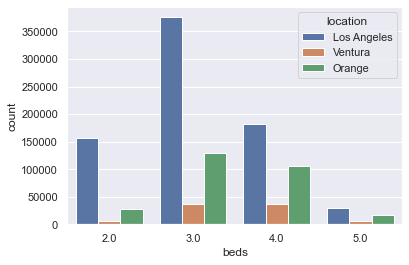

In [18]:
sns.countplot(data=train, x='beds', hue='location')

<AxesSubplot:xlabel='location', ylabel='count'>

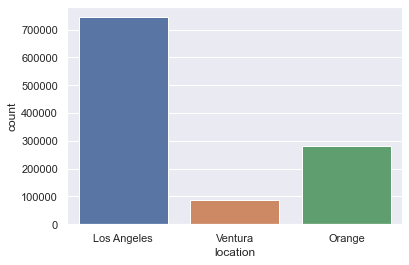

In [19]:
sns.countplot(data=train, x='location')

In [20]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4


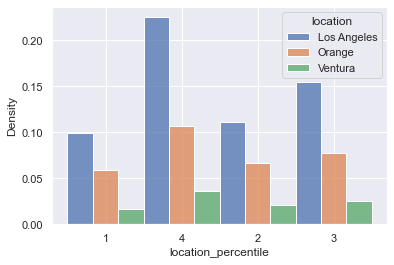

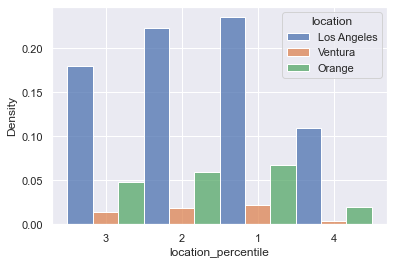

In [22]:
sns.histplot(data=train[train.sqft >= train.sqft.median()], x='location_percentile', hue='location', multiple='dodge', stat='density')
plt.show()
sns.histplot(data=train[train.sqft <= train.sqft.median()], x='location_percentile', hue='location', multiple='dodge', stat='density')
plt.show()

In [23]:
train.columns

Index(['beds', 'baths', 'sqft', 'tax_value', 'built', 'taxes', 'city',
       'location', 'decade', 'location_percentile'],
      dtype='object')

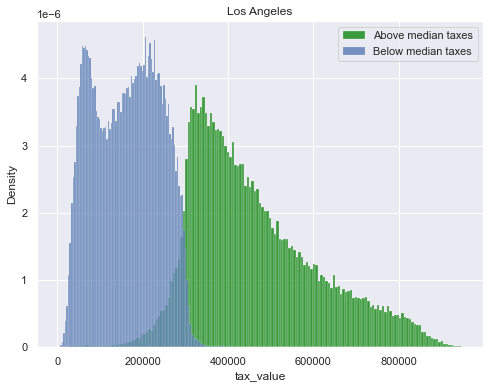

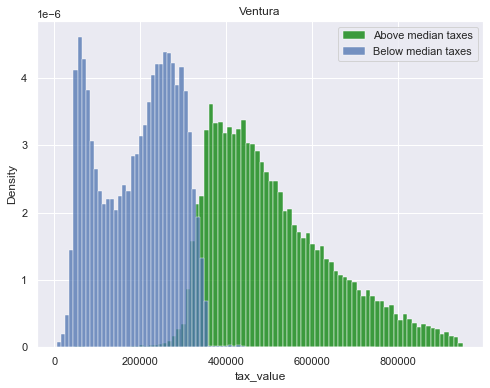

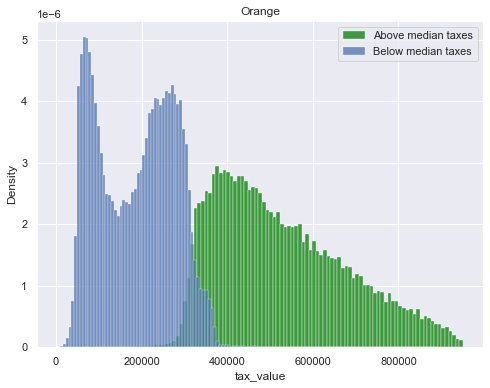

In [24]:
for city in train.location.unique().tolist():
    plt.figure(figsize=(8,6))
    sns.histplot(data=train[(train.taxes >= train.taxes.median())&(train.location==city)], x='tax_value', stat='density', color='green', label='Above median taxes')
    sns.histplot(data=train[(train.taxes <= train.taxes.median())&(train.location==city)], x='tax_value', stat='density', label='Below median taxes')
    plt.title(city)
    plt.legend()
    plt.show()

### Q. What is the relationship with taxes/sqft and tax_value?

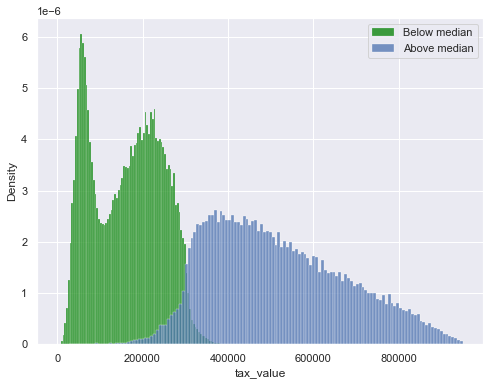

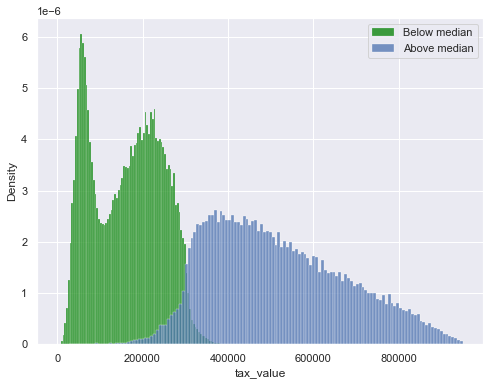

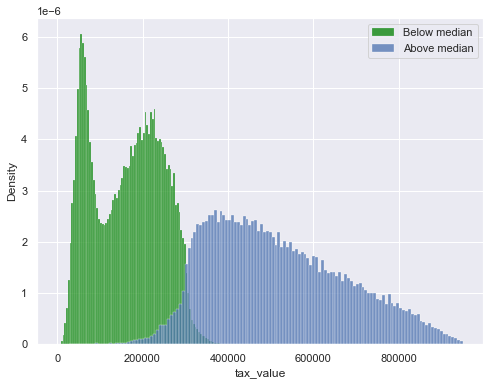

In [25]:
for city in train.location.unique().tolist():
    plt.figure(figsize=(8,6))
    sns.histplot(data=train[(train.taxes <= train.taxes.median())&(train.sqft <= train.sqft.median())], x='tax_value', stat='density', color='green', label='Below median')
    sns.histplot(data=train[(train.taxes >= train.taxes.median())&(train.sqft >= train.sqft.median())], x='tax_value', stat='density', label='Above median')
    plt.legend()
    plt.show()

<Figure size 864x648 with 0 Axes>

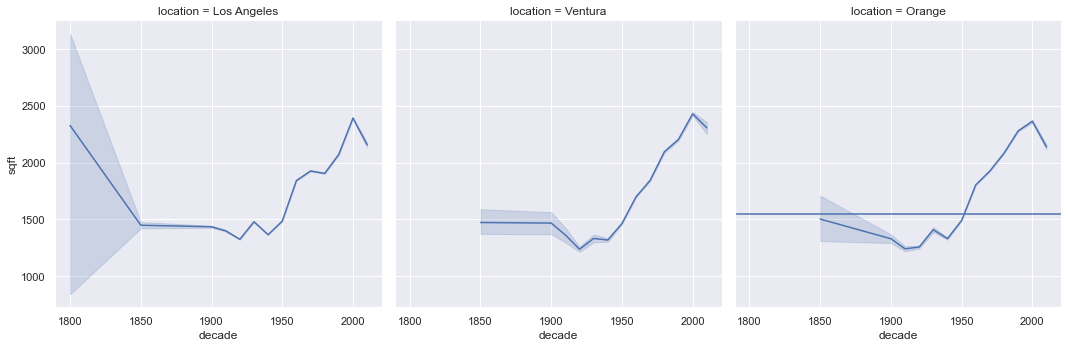

In [41]:
plt.figure(figsize=(12,9))
sns.relplot(data=train, x='decade', y='sqft', col='location', kind='line')
plt.axhline(y=train.sqft.median())
plt.show()

In [42]:
# houses got smaller during wartime/depression, then larger until about 2000 (housing crisis? overcrowding? Y2K? War?)

In [43]:
train.sqft.max()

3410.0

In [44]:
train['area'] = pd.cut(train.sqft,
                      bins=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500],
                      labels=[250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500])

In [45]:
train[train.sqft < 500]

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile,overall_percentile,area
409547,2.0,2.0,169.0,423348.0,1987.0,4563.00,6111.0,Ventura,1980,3,3q,250
1653980,2.0,1.0,396.0,20657.0,1920.0,575.59,6037.0,Los Angeles,1910,1,1q,500
2050196,2.0,1.0,480.0,100776.0,1924.0,1664.65,6037.0,Los Angeles,1920,1,1q,500
427992,2.0,1.0,315.0,182554.0,1959.0,2858.88,6059.0,Orange,1950,1,2q,500
611643,2.0,1.0,442.0,38919.0,1922.0,958.94,6059.0,Orange,1920,1,1q,500
...,...,...,...,...,...,...,...,...,...,...,...,...
457003,2.0,1.0,480.0,94289.0,1924.0,1339.40,6037.0,Los Angeles,1920,1,1q,500
1977541,3.0,1.0,485.0,189444.0,1905.0,2537.98,6059.0,Orange,1900,1,2q,500
469858,3.0,2.0,127.0,103393.0,1977.0,1489.62,6037.0,Los Angeles,1970,1,1q,250
2125472,2.0,1.0,492.0,150238.0,1925.0,2086.95,6037.0,Los Angeles,1920,1,1q,500


In [46]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile,overall_percentile,area
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1,1q,2000
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3,3q,1250
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4,4q,2750
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2,1q,1250
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4,4q,3500


(0.0, 1000.0)

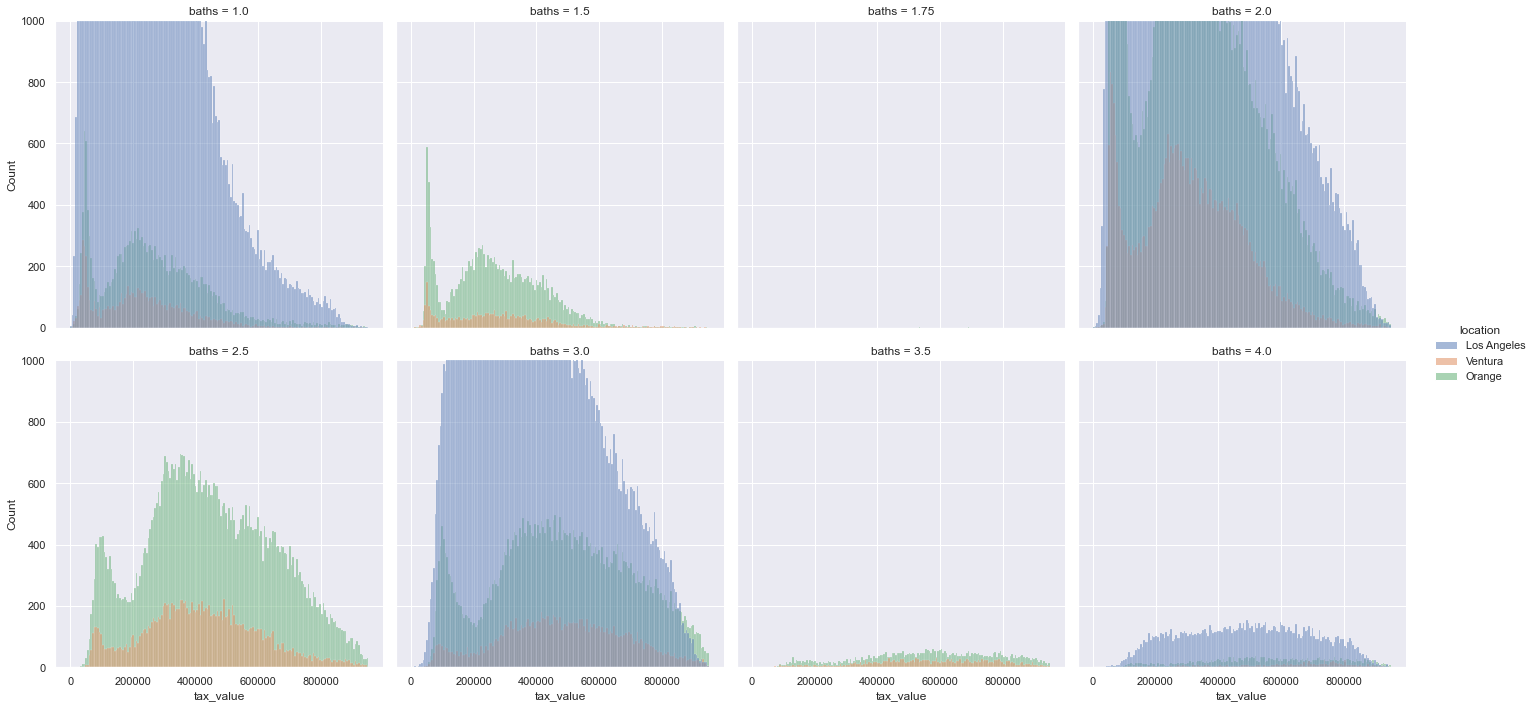

In [47]:
sns.displot(data=train, x='tax_value', hue='location', col='baths', col_wrap=4)
plt.ylim(0,1000)

(0.0, 1000.0)

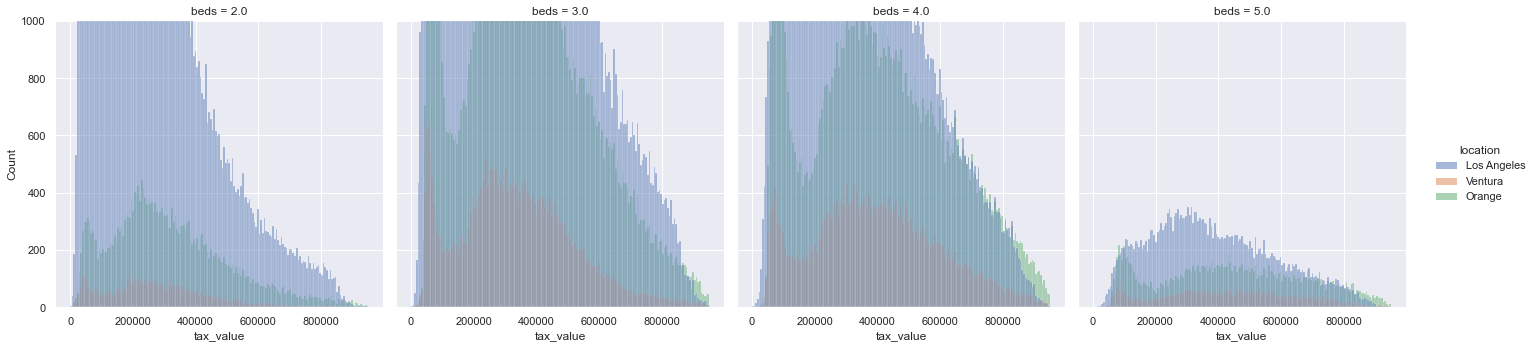

In [48]:
sns.displot(data=train, x='tax_value', hue='location', col='beds', col_wrap=4)
plt.ylim(0,1000)

#### 9. Run the appropriate statistical tests where needed.

#### Hypothesis 1
- Ha1 = Mean of tax_value for houses above median taxes and above median sqft are higher than the population mean tax_value.
- Ho1 = Mean of tax_value for houses above median taxes and above median sqft are equal or lower than the population mean tax_value.
    - T-Test -> one-sample, one-tail
    - Not normally distributed but heavy in samples -> central limit theorem

In [49]:
α = 0.05

pop_μ = train.tax_value.mean()

In [50]:
pop_μ

327901.2780588068

In [51]:
train[(train.taxes > train.taxes.median())&(train.sqft > train.sqft.median())].tax_value.mean()

515520.8107677631

In [52]:
t, p = stats.ttest_1samp(train[(train.taxes > train.taxes.median())&(train.sqft > train.sqft.median())].tax_value, pop_μ, alternative='greater')

In [53]:
t, p

(694.8082705095587, 0.0)

In [54]:
if p/2.5 < α and t > 0:
    print('Reject Ho1')
else:
    print('Fail to reject Ho1')

Reject Ho1


#### A to H1:
- Reject Ho1. Findings suggest tax_values with above median taxes and sqft have a higher mean tax_value than the population tax value mean.
----

#### Hypothesis 2
- Ha2 = Houses built since 1957 have a higher mean tax_value than the population.
- Ho2 = Houses built since 1957 have a lower or equal mean tax_value than the population.
    - T-Test -> one-sample, one-tail
    - Not normally distributed but heavy in samples -> central limit theorem

In [55]:
train.built.median()

1957.0

In [56]:
α = 0.05

pop_μ = train.tax_value.mean()

pop_μ

327901.2780588068

In [57]:
t, p = stats.ttest_1samp(train[train.built >=1957].tax_value, pop_μ, alternative='greater')

In [58]:
t,p

(145.47699226534442, 0.0)

In [59]:
if p/2 < α and t > 0:
    print('Reject Ho2')
else:
    print('Fail to reject Ho2')

Reject Ho2


#### A to H2
- Reject Ho2. Findings suggest tax_values with above median year built have a higher tax value mean than the population tax value mean.
-----

#### Hypothesis 3 - more value in more bathrooms than more bedrooms
- Ha3 = Houses with above median bathroom and below median bedrooms have a higher mean tax_value than houses with above median beds, below med baths
- Ho3 = Houses with above median bathroom and below median bedrooms have a lower or equal mean tax_value than houses with above median beds, below med baths
    - T-Test -> two-sample, one-tail
    - Not normally distributed by heavy in samples -> central limit theorem
    - Need to test for equal variances

In [60]:
α = 0.05
baths_above = train[(train.beds < train.beds.median())&(train.baths > train.baths.median())].tax_value
baths_below = train[(train.beds > train.beds.median())&(train.baths < train.baths.median())].tax_value

In [61]:
s, p = stats.levene(baths_above, baths_below)
p < α

True

Variances differ, must set equal_var to False

In [62]:
t, p = stats.ttest_ind(baths_above, baths_below, equal_var=False, alternative='greater')
t,p

(55.00315705138372, 0.0)

In [63]:
if p/2 < α and t > 0:
    print('Reject Ho3')
else:
    print('Fail to reject Ho3')

Reject Ho3


In [64]:
train.beds.median(), train.baths.median()

(3.0, 2.0)

#### A to H3:
- Reject Ho3. Findings suggest there is a higher tax_value in more bathrooms than more bedrooms
----

#### Hypothesis 3b - more value per bathroom than value per bedroom
- Ha3b = Houses jump more in tax value with an additional bathroom than an additional bedroom
- Ho3b = Houses jump equal or less in tax value with an additional bathroom than an additional bedroom
    - T-test wont work here due to so few samples/jumps in baths and beds.
    - 1. Test avg jump of median tax value of each range.
    - 2. Test 3 beds, 2 baths median tax value vs 3 beds, 3 baths vs 2 beds, 2 baths vs 2 beds, 3 baths

In [65]:
bed_jumps = []
i = train.beds.min()
while i <= train.beds.max():
    bed_jumps.append(train[train.beds == i].tax_value.median())
    i += 1
bed_jumps

[233164.0, 285144.0, 347783.5, 393075.0]

In [66]:
bed_jump_diffs = [bed_jumps[1]-bed_jumps[0], bed_jumps[2]-bed_jumps[1], bed_jumps[3]-bed_jumps[2]]
bed_jump_diffs = pd.Series(bed_jump_diffs)
bed_jump_diffs

0    51980.0
1    62639.5
2    45291.5
dtype: float64

In [67]:
bath_jumps = []
i = train.baths.min()
while i <= train.baths.max():
    bath_jumps.append(train[train.baths == i].tax_value.median())
    i += 1
bath_jumps

[213976.0, 277578.0, 405845.0, 512487.0]

In [68]:
bath_jump_diffs = [bath_jumps[1]-bath_jumps[0], bath_jumps[2]-bath_jumps[1], bath_jumps[3]-bath_jumps[2]]
bath_jump_diffs = pd.Series(bath_jump_diffs)
bath_jump_diffs

0     63602.0
1    128267.0
2    106642.0
dtype: float64

In [69]:
bath_jump_diffs.mean() > bed_jump_diffs.mean()

True

In [70]:
values = {'3 bed, 3 bath' : train[(train.beds==3)&(train.baths==3)].tax_value.mean(),
          '2 bed, 3 bath' : train[(train.beds==2)&(train.baths==3)].tax_value.mean(),
          '3 bed, 2 bath' : train[(train.beds==3)&(train.baths==2)].tax_value.mean(),
          '2 bed, 2 bath' : train[(train.beds==2)&(train.baths==2)].tax_value.mean()
         }
values

{'3 bed, 3 bath': 415871.36455087113,
 '2 bed, 3 bath': 433162.56029011786,
 '3 bed, 2 bath': 302432.5865145721,
 '2 bed, 2 bath': 324471.32630114537}

#### A to H3b:
- Findings suggest there is a larger tax_value jump in adding a bathroom than adding any bedrooms.
- Findings show there is more value in 2 bedrooms than 3 bedrooms. 
    - possibly due to location, look at isolating this feature
----

#### Q3c. Does location play a role in bedroom/bathroom value?

In [71]:
la_values = {'3 bed, 3 bath' : train[(train.beds==3)&(train.baths==3)&(train.location =='Los Angeles')].tax_value.mean(),
          '2 bed, 3 bath' : train[(train.beds==2)&(train.baths==3)&(train.location=='Los Angeles')].tax_value.mean(),
          '3 bed, 2 bath' : train[(train.beds==3)&(train.baths==2)&(train.location=='Los Angeles')].tax_value.mean(),
          '2 bed, 2 bath' : train[(train.beds==2)&(train.baths==2)&(train.location=='Los Angeles')].tax_value.mean()
         }
la_values

{'3 bed, 3 bath': 390051.74800050247,
 '2 bed, 3 bath': 420492.7697368421,
 '3 bed, 2 bath': 293792.76722493814,
 '2 bed, 2 bath': 317164.70649853046}

In [72]:
orange_values = {'3 bed, 3 bath' : train[(train.beds==3)&(train.baths==3)&(train.location =='Orange')].tax_value.mean(),
          '2 bed, 3 bath' : train[(train.beds==2)&(train.baths==3)&(train.location=='Orange')].tax_value.mean(),
          '3 bed, 2 bath' : train[(train.beds==3)&(train.baths==2)&(train.location=='Orange')].tax_value.mean(),
          '2 bed, 2 bath' : train[(train.beds==2)&(train.baths==2)&(train.location=='Orange')].tax_value.mean()
         }
orange_values

{'3 bed, 3 bath': 507129.13533771964,
 '2 bed, 3 bath': 466160.5862068966,
 '3 bed, 2 bath': 329739.50961788034,
 '2 bed, 2 bath': 348949.83691268874}

In [73]:
ventura_values = {'3 bed, 3 bath' : train[(train.beds==3)&(train.baths==3)&(train.location =='Ventura')].tax_value.mean(),
          '2 bed, 3 bath' : train[(train.beds==2)&(train.baths==3)&(train.location=='Ventura')].tax_value.mean(),
          '3 bed, 2 bath' : train[(train.beds==3)&(train.baths==2)&(train.location=='Ventura')].tax_value.mean(),
          '2 bed, 2 bath' : train[(train.beds==2)&(train.baths==2)&(train.location=='Ventura')].tax_value.mean()
         }
ventura_values

{'3 bed, 3 bath': 479453.45143385755,
 '2 bed, 3 bath': 467723.1271186441,
 '3 bed, 2 bath': 310182.101895836,
 '2 bed, 2 bath': 339391.3008495752}

#### A3c:
- This observation is seen across locations for 2 bathrooms. Not for 3 bathrooms. 
----

#### 10. What independent variables are correlated with the dependent variable, home value?

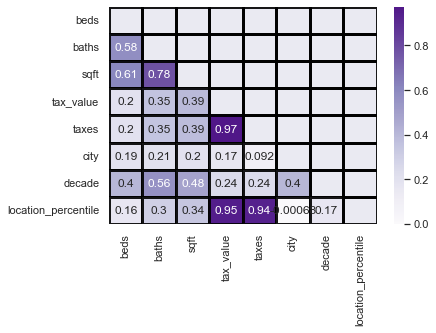

In [74]:
zil_corr = train.drop(columns=['built', 'location']).corr(method='spearman')
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zil_corr, cmap='Purples', annot=True, mask=np.triu(zil_corr), **kwargs)
plt.show()

In [75]:
# taxes.

#### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [76]:
#sqft and baths has a high correlation. This makes sense. 

#### Looking at new feature engineering sklean things

In [42]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression


In [39]:
X_train, y_train = train.drop(columns=['tax_value','location']), train.tax_value

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113171 entries, 759032 to 843328
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   beds                 1113171 non-null  float64
 1   baths                1113171 non-null  float64
 2   sqft                 1113171 non-null  float64
 3   built                1113171 non-null  float64
 4   taxes                1113171 non-null  float64
 5   city                 1113171 non-null  float64
 6   decade               1113171 non-null  int64  
 7   location_percentile  1113171 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 76.4+ MB


In [41]:
X_train.location_percentile = X_train.location_percentile.astype(int)

In [45]:
explore.select_kbest(X_train, y_train, 5)

['baths', 'sqft', 'built', 'taxes', 'location_percentile']


In [36]:
kbest = SelectKBest(f_regression, k=4)
kbest.fit(X_train, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x147a285e0>)

In [37]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=X_train.columns)
kbest_results

,p,f
beds,0.0,4.661763e+04
baths,0.0,1.608616e+05
sqft,0.0,2.431979e+05
built,0.0,7.408530e+04
taxes,0.0,1.760883e+07
city,0.0,1.738750e+04
decade,0.0,7.027806e+04
location_percentile,0.0,4.326879e+06


In [32]:
explore.select_rfe(X_train, y_train, 4)

['beds', 'baths', 'city', 'location_percentile']


In [43]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 2)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [44]:
pd.DataFrame({'rfe_ranking' : rfe.ranking_}, index=X_train.columns)


,rfe_ranking
beds,2
baths,1
sqft,7
built,4
taxes,5
city,3
decade,6
location_percentile,1


In [33]:
explore.select_sfs(X_train, y_train, 4)

['sqft', 'built', 'taxes', 'city']


### BACK TO VIZ EXPLORATION

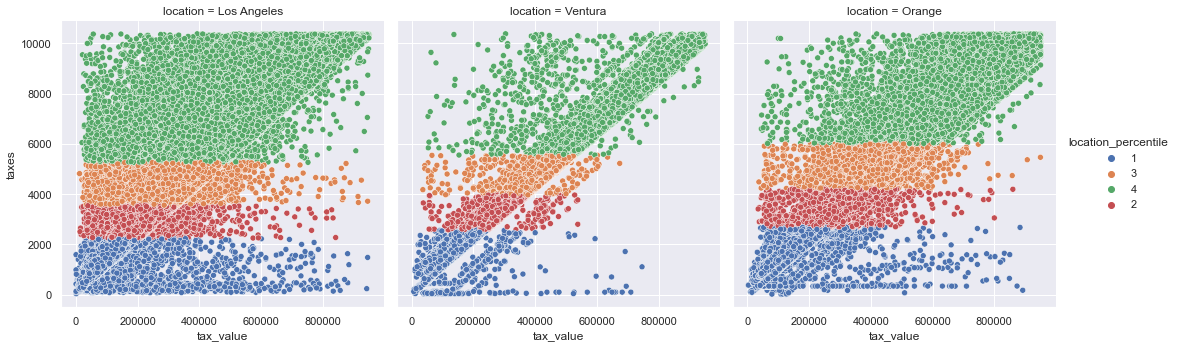

In [111]:
# tax vs tax_value
sns.relplot(data=train, x='tax_value', y='taxes', hue='location_percentile', col='location')
plt.show()

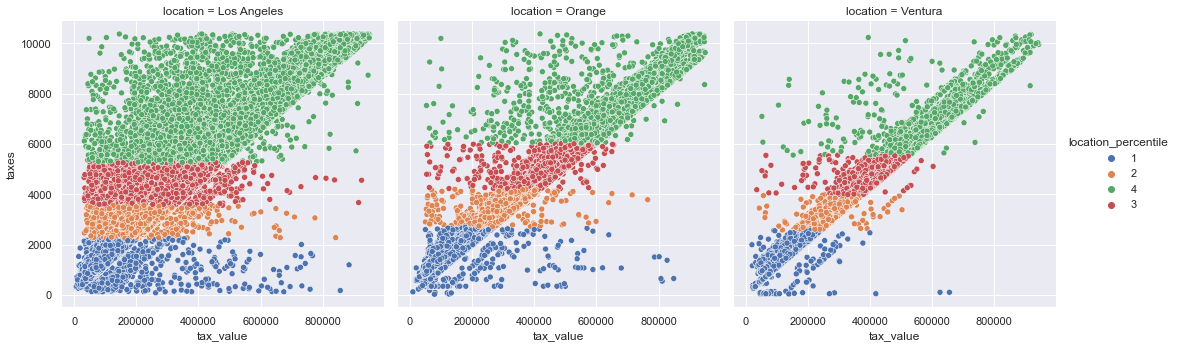

In [113]:
# tax vs tax_value for only 3 beds, 3 baths
sns.relplot(data=train[(train.beds==3)&(train.baths==2)], x='tax_value', y='taxes', hue='location_percentile', col='location')
plt.show()

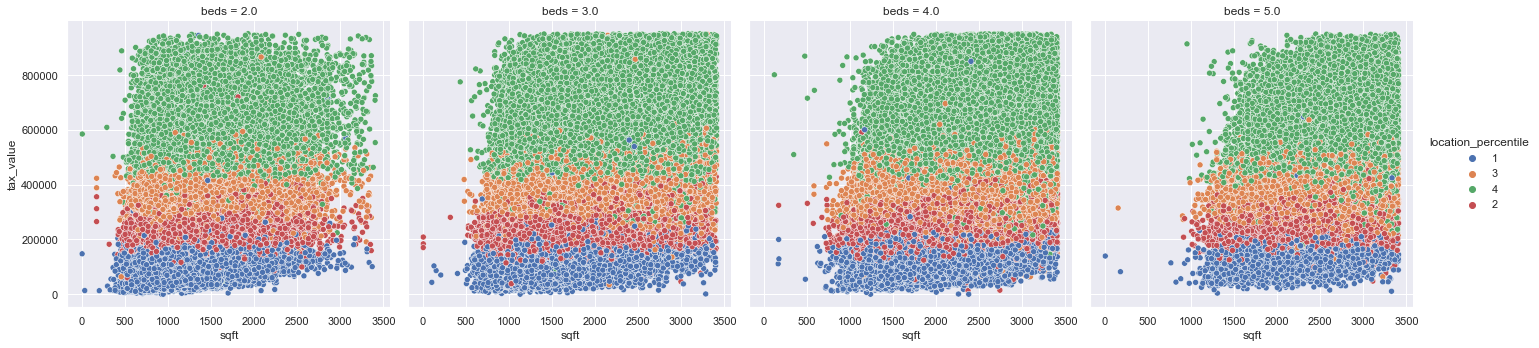

In [114]:
# tax_ val vs sqft
sns.relplot(data=train, y='tax_value', x='sqft', hue='location_percentile', col='beds')
plt.show()

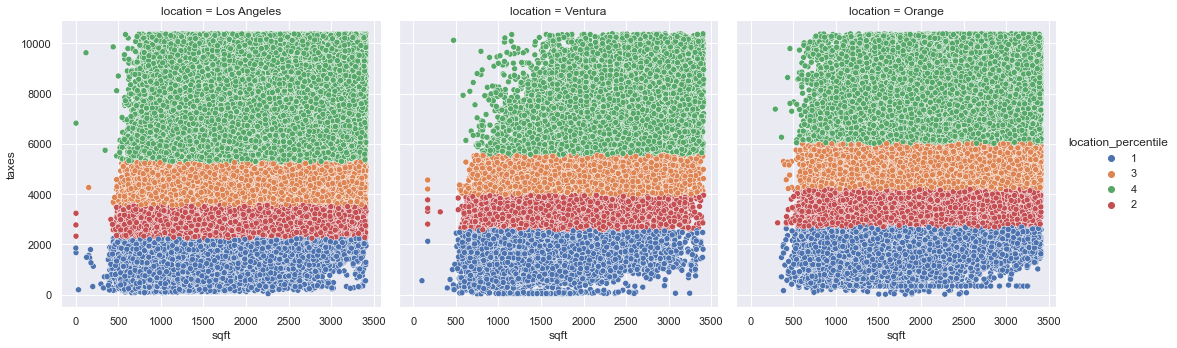

In [115]:
# taxes vs sqft
sns.relplot(data=train, y='taxes', x='sqft', hue='location_percentile', col='location')
plt.show()

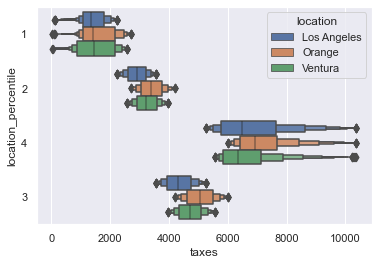

In [137]:
sns.boxenplot(data=train[(train.baths == 2)&(train.beds == 3)], x='taxes', hue='location', y='location_percentile')
plt.show()

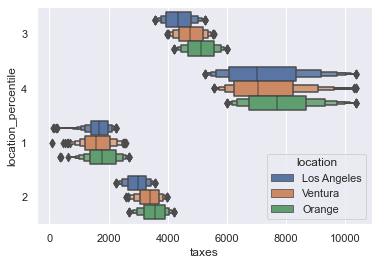

In [139]:
sns.boxenplot(data=train[(train.baths == 3)&(train.beds == 3)], x='taxes', hue='location', y='location_percentile')
plt.show()

In [58]:
train.tax_value.median()/train.taxes.median(), train.tax_value.max()/train.taxes.max(), train.tax_value.min()/train.taxes.min()

(79.15530935059735, 91.63302080422443, 1.0869565217391306)

In [81]:
train[train.location=='Los Angeles'].head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4


In [66]:
train[train.index==759032].tax_value/train[train.index==759032].taxes

759032    77.323152
dtype: float64

In [67]:
train[train.index==17435].tax_value/train[train.index==17435].taxes

17435    80.66829
dtype: float64

8381.447421031588